Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


C:\Users\boetr\AppData\Local\Temp\ipykernel_8876\3594674692.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')
C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boetr\AppData\Loca

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


C:\Users\boetr\AppData\Local\Temp\ipykernel_8876\3594674692.py:69: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='r', bins=bins, ax=ax)
C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packag

Accuracy: 0.8100558659217877


C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


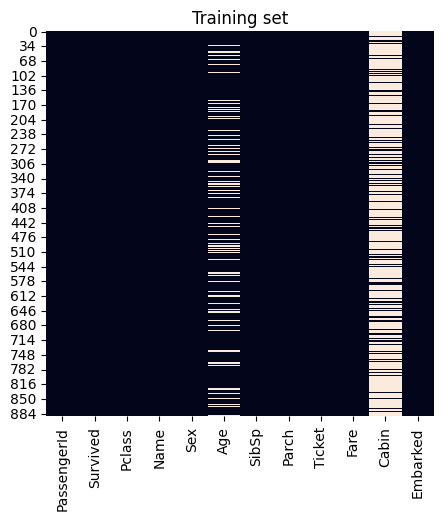

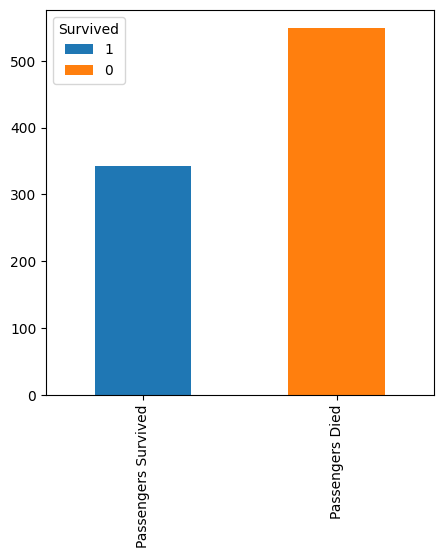

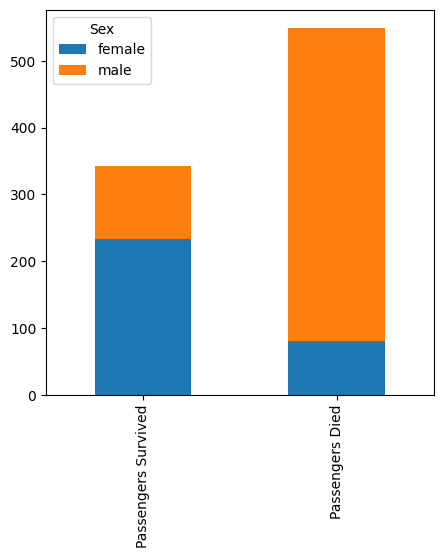

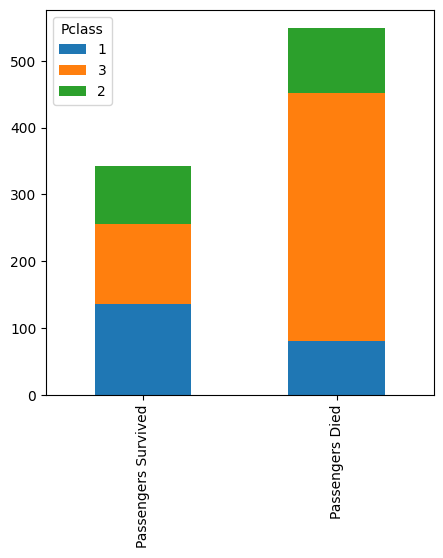

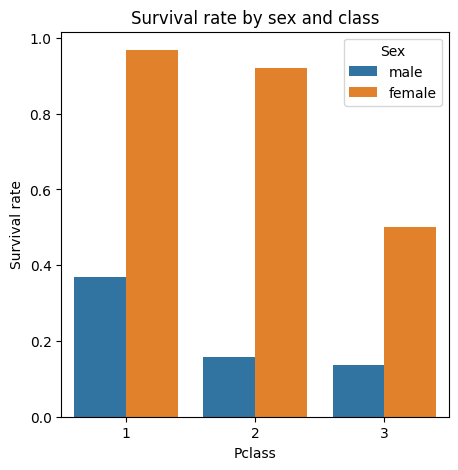

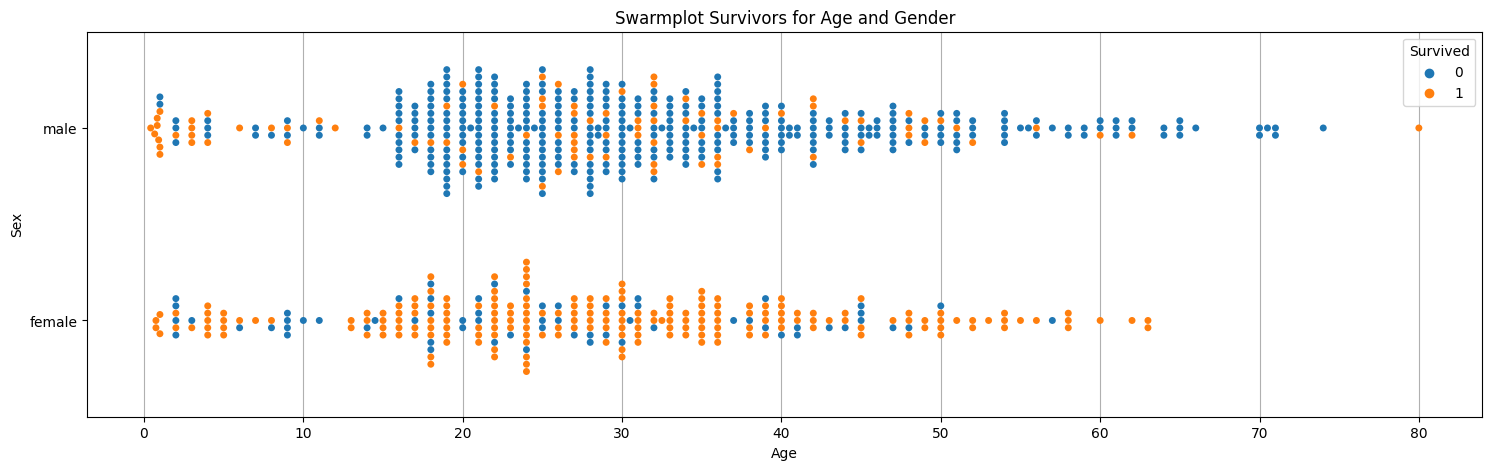

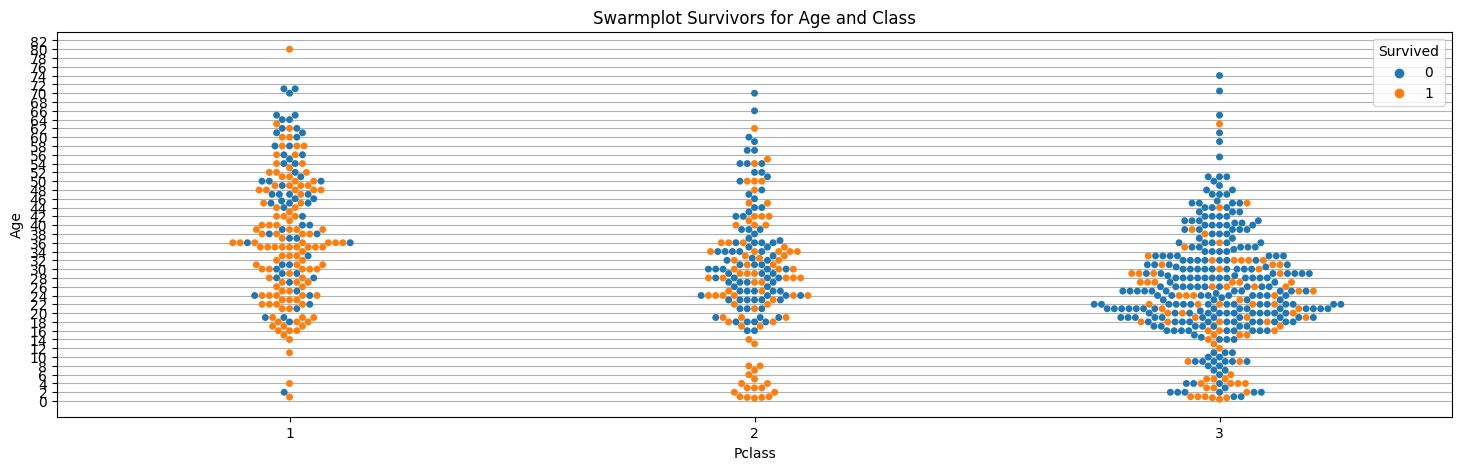

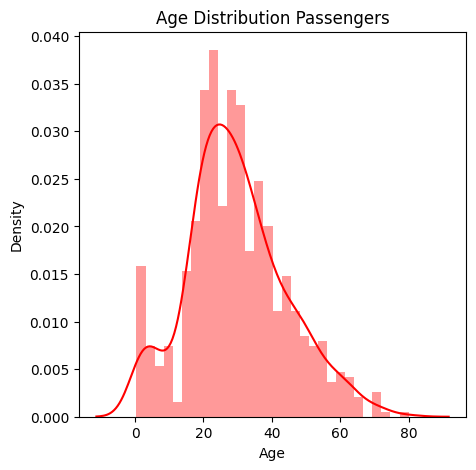

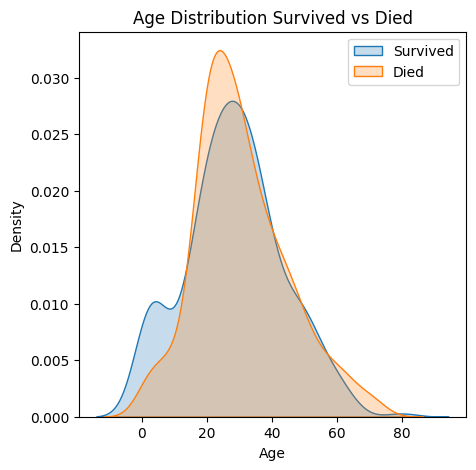

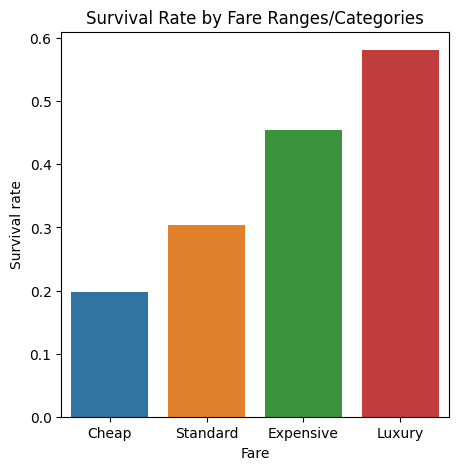

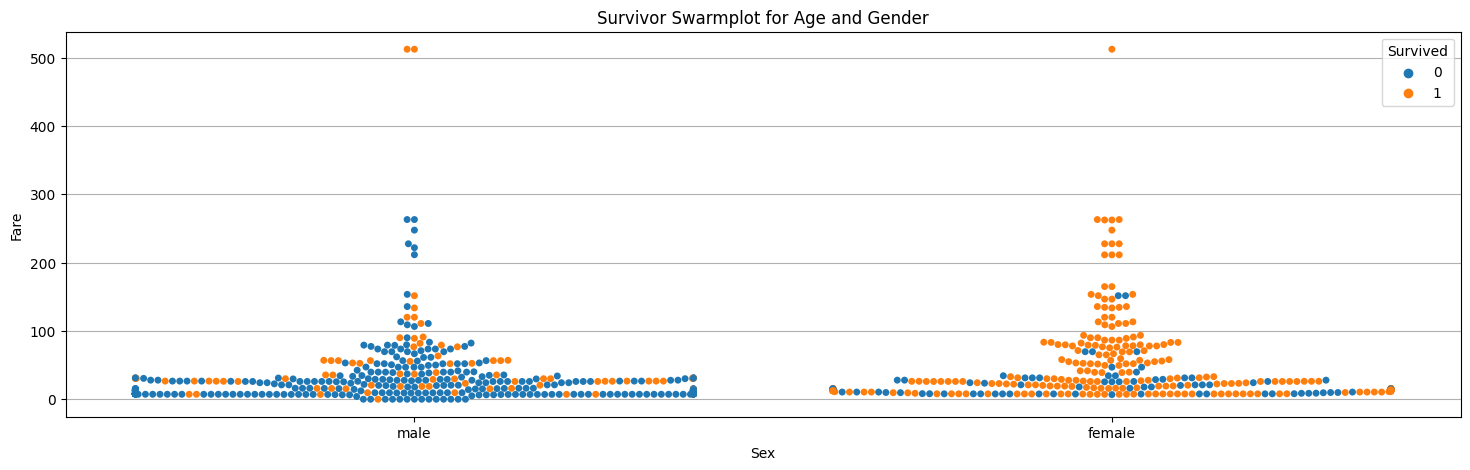

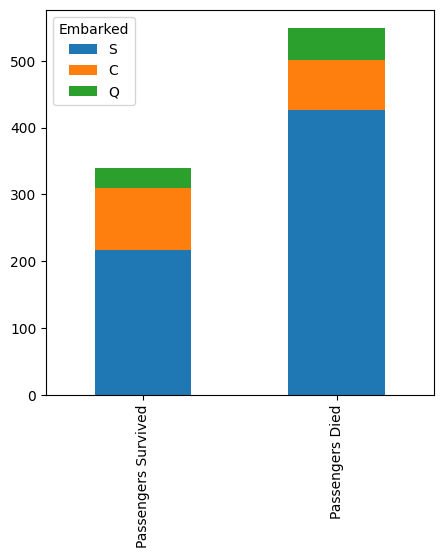

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Inlezen data sets
data = pd.read_csv("C:/Users/boetr/Desktop/Programeren/titanic/train.csv")
test_data = pd.read_csv("C:/Users/boetr/Desktop/Programeren/titanic/test.csv")

test_data['Survived'] = 0


#Exploratory data analysis
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize = (5,5))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar=False)

#Plot om ontbrekende data te visualiseren
plot_missing_data(data, 'Training set')

print(data['Survived'].value_counts())
print(data['Survived'].value_counts(normalize=True))

def bar_chart_stacked(dataset, feature, stacked=True):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ['Passengers Survived', 'Passengers Died']
    ax = df_survived_dead.plot(kind='bar', stacked=stacked, figsize=(5,5))

bar_chart_stacked(data, 'Survived')
bar_chart_stacked(data, 'Sex')
bar_chart_stacked(data, 'Pclass')

def bar_chart_compare(dataset, feature1, feature2=None):
    plt.figure(figsize = [5,5])
    plt.title("Survival rate by sex and class")
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')

bar_chart_compare(data, 'Pclass','Sex')
print(data.groupby(['Pclass','Sex']).Survived.mean().to_frame())

def plot_swarm_survivors(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize = (18, 5))
    ax.grid(True)
    #plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Survived', data=dataset).set_title(title)

def plot_swarm_survivors_y(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize = (18, 5))
    ax.grid(True)
    plt.yticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Survived', data=dataset).set_title(title)

plot_swarm_survivors(data, 'Sex', 'Age', "Swarmplot Survivors for Age and Gender")
plot_swarm_survivors_y(data, 'Age', 'Pclass', "Swarmplot Survivors for Age and Class")

print(data.Fare.describe())

def plot_distribution(dataset, feature, title, bins = 30 , hist= True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(dataset[feature], color='r', bins=bins, ax=ax)

plot_distribution(data, 'Age', 'Age Distribution Passengers')

def plot_kernel_density_estimate_survivors(dataset, feature, title, fsize = (5,5)):
    fix, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    ax.set_xlabel('Age')
    sns.kdeplot(dataset[feature].loc[dataset['Survived']==1], shade=True, ax=ax, label ='Survived')
    sns.kdeplot(dataset[feature].loc[dataset['Survived']==0], shade=True, ax=ax, label ='Died')
    ax.legend()
    
plot_kernel_density_estimate_survivors(data, 'Age', 'Age Distribution Survived vs Died')

def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories),labels=categories)
    axarr.set_title(title)
    sns.barplot(x=fare_ranges, y=dataset.Survived, ci=None, ax=axarr).set_ylabel('Survival rate')

plot_quartiles(data, "Fare", "Survival Rate by Fare Ranges/Categories", ['Cheap', 'Standard', 'Expensive', 'Luxury'])

plot_swarm_survivors(data, 'Fare', 'Sex', 'Survivor Swarmplot for Age and Gender')

#Vervang Fare == 0 met NaN
data.loc[data['Fare'] == 0, 'Fare'] = np.NaN
test_data.loc[data['Fare'] == 0, 'Fare'] = np.NaN

bar_chart_stacked(data, 'Embarked')



X = data[['Sex', 'Age', 'Pclass']]
y = data['Survived']

X['Age'].fillna(X['Age'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [2]:
print(accuracy)
data.head()









0.8100558659217877


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
